In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [102]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [103]:
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [104]:
# Rename Mouse ID column to Mouse_ID 
mouse_metadata_df = mouse_metadata_df.rename(columns={"Mouse ID": "Mouse_ID"})
study_results_df = study_results_df.rename(columns={"Mouse ID": "Mouse_ID"})

In [105]:
# Merge both mouse_metadata_df and study_results_df DataFrames into a single DataFrame
merged_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse_ID", how="outer")

In [106]:
# Display the number of unique mice IDs in the data
unique_mice_count = merged_df["Mouse_ID"].nunique()
print(f"Number of Unique Mice IDs: {unique_mice_count}")

Number of Unique Mice IDs: 249


In [107]:
merged_df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [108]:
# Check for any mouse ID with duplicate time points
duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=["Mouse_ID", "Timepoint"])]["Mouse_ID"].unique()
print(f"Mouse IDs with Duplicate Time Points: {duplicate_mouse_ids}")

Mouse IDs with Duplicate Time Points: ['g989']


In [109]:
# Display the data associated with the mouse ID with duplicate time points
duplicate_mouse_data = merged_df[merged_df["Mouse_ID"].isin(duplicate_mouse_ids)]
print("Data associated with Duplicate Mouse IDs:")
print(duplicate_mouse_data)

# Create a new DataFrame where data associated with duplicate mouse ID is removed
cleaned_df = merged_df[~merged_df["Mouse_ID"].isin(duplicate_mouse_ids)]

Data associated with Duplicate Mouse IDs:
    Mouse_ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         3

In [110]:
#Display the clean dataframe after removing the duplicate mouse id
cleaned_df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [111]:
# Display the updated number of unique mice IDs
updated_unique_mice_count = cleaned_df["Mouse_ID"].nunique()
print(f"Updated Number of Unique Mice IDs: {updated_unique_mice_count}")

Updated Number of Unique Mice IDs: 248


In [112]:
# Generate Summary Statistics
summary_stats_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display summary statistics
summary_stats_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [113]:
# Generate Summary Statistics
summary_stats_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename colummns to display the statistics
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

In [114]:
# Display summary statistics
summary_stats_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


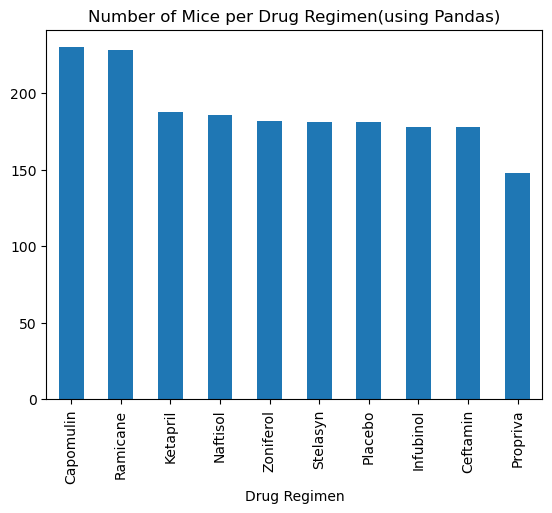

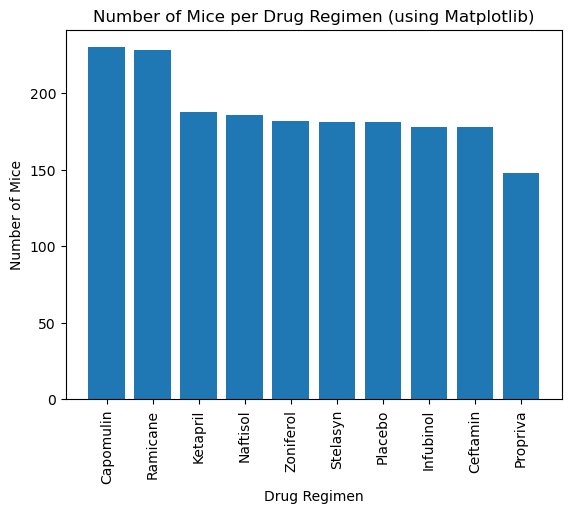

In [115]:
# Bar Charts
bar_chart_pandas = cleaned_df["Drug Regimen"].value_counts().plot(kind='bar', title='Number of Mice per Drug Regimen(using Pandas)')
plt.show()

bar_chart_matplotlib = cleaned_df["Drug Regimen"].value_counts()
plt.bar(bar_chart_matplotlib.index, bar_chart_matplotlib.values)
plt.title('Number of Mice per Drug Regimen (using Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=90)
plt.show()

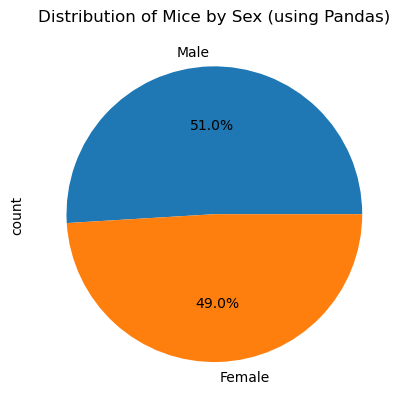

In [116]:
# Pie Charts
pie_chart_pandas = cleaned_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%",  title='Distribution of Mice by Sex (using Pandas)')
plt.show()


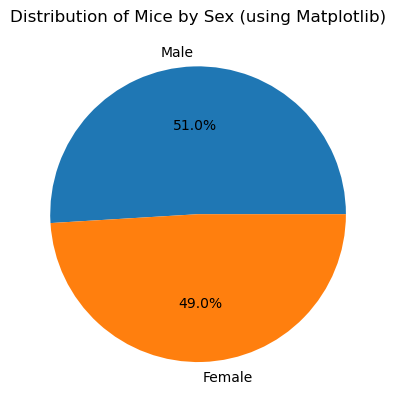

In [117]:
# Bar Chart using matplotlib
pie_chart_matplotlib = cleaned_df["Sex"].value_counts()
plt.pie(pie_chart_matplotlib, labels=["Male","Female"], autopct="%1.1f%%")
plt.title('Distribution of Mice by Sex (using Matplotlib)')
plt.show()

In [118]:
cleaned_df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [119]:
print(cleaned_df.columns)

Index(['Mouse_ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


In [120]:
# Assuming the four most promising treatments are Capomulin, Ramicane, Infubinol, and Ceftamin
promising_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a grouped DataFrame with the last (greatest) time point for each mouse
final_tumor_volume_df = cleaned_df.groupby(['Mouse_ID', 'Drug Regimen'])['Timepoint'].max().reset_index()
merged_final_df = pd.merge(final_tumor_volume_df, cleaned_df, on=['Mouse_ID', 'Timepoint'], how='left')

# Create a list to hold the tumor volume data
tumor_volume_data = []

In [121]:
print(merged_final_df.columns)

Index(['Mouse_ID', 'Drug Regimen_x', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites', 'Drug Regimen_y', 'Sex', 'Age_months',
       'Weight (g)'],
      dtype='object')


In [122]:
# Loop through each drug in the treatment list and append the final tumor volumes
for treatment in promising_treatments:
    tumor_volume_data.append(merged_final_df.loc[merged_final_df['Drug Regimen_x'] == treatment]['Tumor Volume (mm3)'].tolist())

# Determine outliers
outliers = []
for i in range(len(promising_treatments)):
    quartiles = st.iqr(tumor_volume_data[i])
    lower_bound = merged_final_df['Tumor Volume (mm3)'].quantile(0.25) - (1.5 * quartiles)
    upper_bound = merged_final_df['Tumor Volume (mm3)'].quantile(0.75) + (1.5 * quartiles)
    outliers.append([x for x in tumor_volume_data[i] if x < lower_bound or x > upper_bound])

Potential outliers for Capomulin: [30.48598484, 28.43096411, 33.32909778, 32.37735684, 23.34359787, 31.02392294, 28.48403281, 31.8962384]
Potential outliers for Ramicane: [29.12847181, 31.56046955, 22.05012627, 30.56462509, 31.09533505, 30.27623175, 30.63869575]
Potential outliers for Infubinol: []
Potential outliers for Ceftamin: []


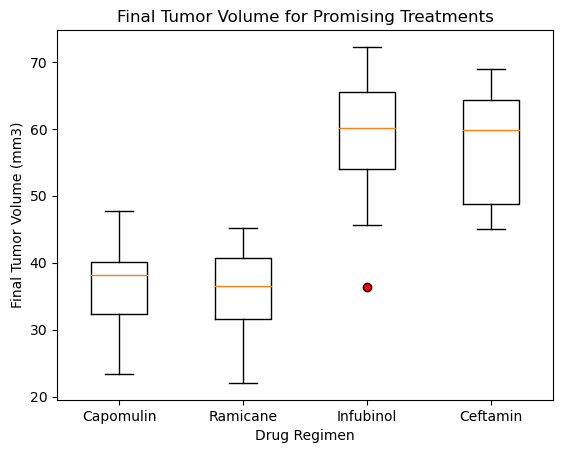

In [123]:
# Print results
for i in range(len(promising_treatments)):
    print(f"Potential outliers for {promising_treatments[i]}: {outliers[i]}")

# Generate a box plot
plt.boxplot(tumor_volume_data, labels=promising_treatments, flierprops=dict(markerfacecolor='red'))
plt.title('Final Tumor Volume for Promising Treatments')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

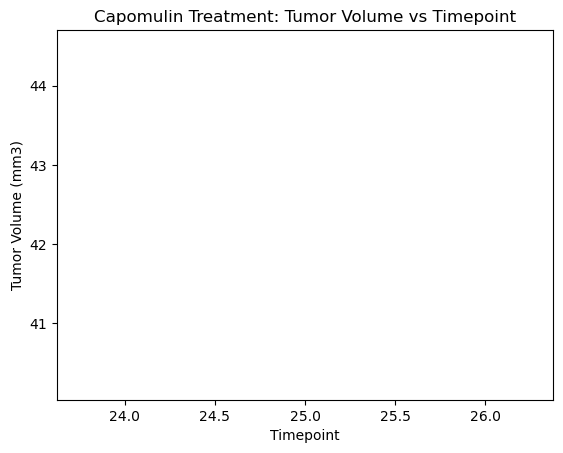

In [124]:
import matplotlib.pyplot as plt

# Assuming you want to select a random mouse treated with Capomulin
capomulin_mouse = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'].sample(1)

# Line Plot
plt.plot(capomulin_mouse['Timepoint'].tolist(), capomulin_mouse['Tumor Volume (mm3)'].tolist())
plt.title('Capomulin Treatment: Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


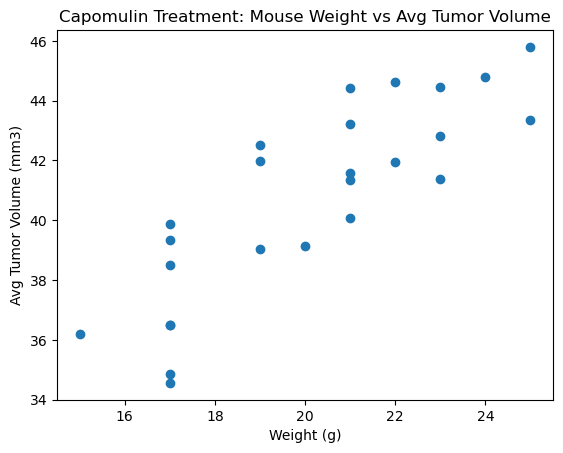

In [125]:
# Scatter Plot
average_tumor_volume_capomulin = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse_ID')['Tumor Volume (mm3)'].mean()
average_weight_capomulin = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse_ID')['Weight (g)'].mean()

plt.scatter(average_weight_capomulin, average_tumor_volume_capomulin)
plt.title('Capomulin Treatment: Mouse Weight vs Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

Correlation between Mouse Weight and Avg Tumor Volume: 0.841936342469472


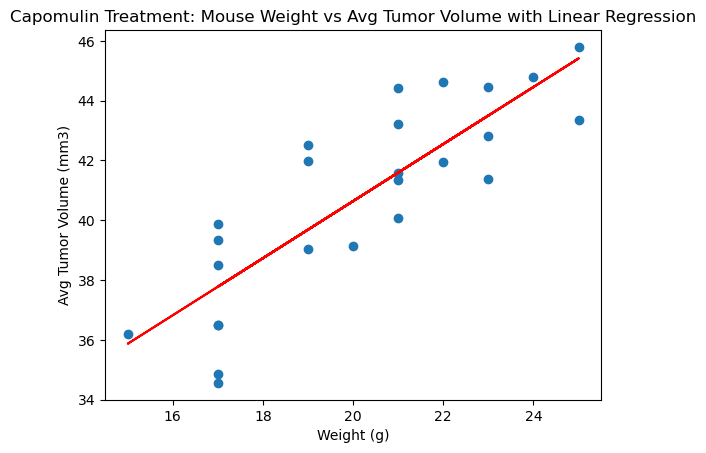

In [100]:
# Calculate Correlation and Regression
correlation = st.pearsonr(average_weight_capomulin, average_tumor_volume_capomulin)
print(f"Correlation between Mouse Weight and Avg Tumor Volume: {correlation[0]}")

slope, intercept, r_value, p_value, std_err = st.linregress(average_weight_capomulin, average_tumor_volume_capomulin)
regress_values = average_weight_capomulin * slope + intercept

# Plot the linear regression model on top of the scatter plot
plt.scatter(average_weight_capomulin, average_tumor_volume_capomulin)
plt.plot(average_weight_capomulin, regress_values, color='red')
plt.title('Capomulin Treatment: Mouse Weight vs Avg Tumor Volume with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()